#MNIST FASHION Vanilla Encoder




In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
input_image = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
decoded_images = autoencoder.predict(x_test)
score = autoencoder.evaluate(x_test, x_test, batch_size=128)
print("score = ", score)








Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 2s 39us/step - loss: 0.0611 - val_loss: 0.0357
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0302 - val_loss: 0.0262
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0235 - val_loss: 0.0214
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0198 - val_loss: 0.0186
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0175 - val_loss: 0.0167
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0161 - val_loss: 0.0157
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0152 - val_loss: 0.0149
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0145 - val_loss: 0.0144
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0141 - v

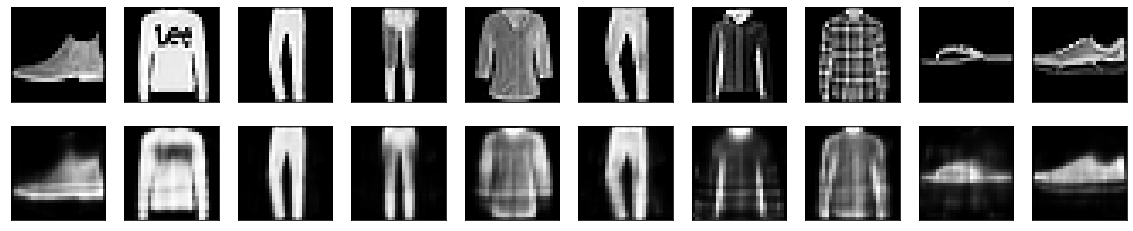

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The top row is the original clothes, and the bottom row is the reconstructed clothes. We are losing quite a bit of detail with this basic approach.


#Adding a sparsity constraint on the encoded representations


In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [26]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
decoded_images = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1609 - val_loss: 0.1465
Epoch 2/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1385 - val_loss: 0.1301
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1246 - val_loss: 0.1186
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1148 - val_loss: 0.1105
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1079 - val_loss: 0.1046
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1029 - val_loss: 0.1004
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0992 - val_loss: 0.0973
Epoch 8/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0965 - val_loss: 0.0950
Epoch 9/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0945 - val_loss: 0.0

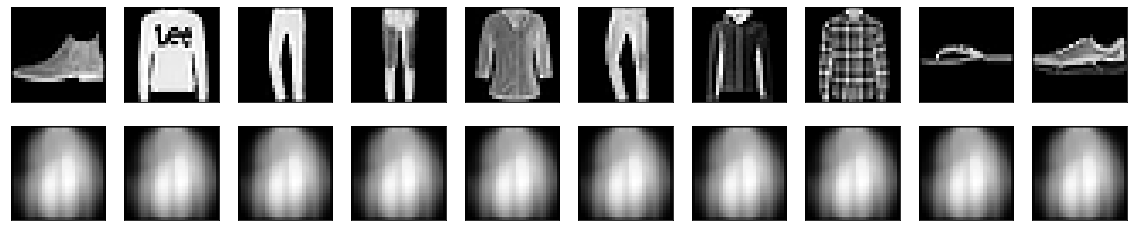

In [27]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The decoded images are in pretty bad precision comparing the original dataset. 


#Deep autoencoder 


In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [29]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.5052 - val_loss: 0.4072
Epoch 2/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.3916 - val_loss: 0.3832
Epoch 3/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.3739 - val_loss: 0.3690
Epoch 4/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.3647 - val_loss: 0.3622
Epoch 5/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.3649 - val_loss: 0.4262
Epoch 6/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.7556 - val_loss: 0.6671
Epoch 7/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.6571 - val_loss: 0.6476
Epoch 8/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.6388 - val_loss: 0.6307
Epoch 

In [0]:
decoded_images = autoencoder.predict(x_test)

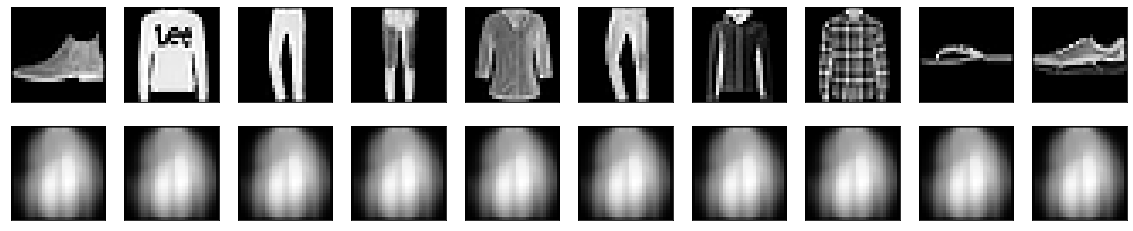

In [31]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Convolutional autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [36]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples


Epoch 1/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.4048 - val_loss: 0.3544

Epoch 2/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3554 - val_loss: 0.3503
Epoch 3/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3442 - val_loss: 0.3316
Epoch 4/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3379 - val_loss: 0.3771
Epoch 5/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3340 - val_loss: 0.3219
Epoch 6/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3340 - val_loss: 0.3237
Epoch 7/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3329 - val_loss: 0.3360
Epoch 8/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3297 - val_loss: 0.3468
Epoch 9/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3308 - val_loss: 0.3317
Ep

For the VAE: https://github.com/Knight13/beta-VAE-disentanglement
